### Barbara Karakyriakou


PSET4 is designed to get you familiar with supervised machine learning and some of the basic techniques of creating features and tuning models. 

## Problem 1: 
# Wine Classification using Naive Bayes Classification

I found a bunch of data with information about wine from Northern Portugal. We have two data sets: one with data for white wine, and one for red wine. Even though the data is separated by the type of wine, I wanted to see if we can use Naive Bayes Classification to correctly classify a wine as either red or white based on the value of the physicochemical features of each wine. 


#### Citation:


I found this data set from the University of Califorina (https://archive.ics.uci.edu/ml/datasets/Wine+Quality). You will be using two data sets: white.csv and red.csv. 
Each dataset has the following columns:

- fixed acidity 
- volatile acidity 
- citric acid 
- residual sugar 
- chlorides 
- free sulfur dioxide 
- total sulfur dioxide 
- density 
- pH 
- sulphates 
- alcohol 
- quality (score between 0 and 10)

### Step 1: Putting together our dataset

The first thing that we want to do is create the grand dataset that we will be performing the classification on. First, import the white and red dataframes as whiteWine, redWine, and add a new column to each called "type". In the whiteWine dataframe, the value should be "white", and in the redWine dataframe, the value should be "red". 

NOTE: The delimiter of these datases are semicolons (;), not commas! 

In [46]:
# import everything we need

import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [47]:
# import white.csv into a dataframe called whiteWine. 
whiteWine = pd.read_csv('white.csv', sep=';')

# add a column called "type" that with the value "white"
whiteWine['type'] = 'white'
# print first few rows of dataframe when you're done. 
whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [48]:
# import red.csv into a dataframe called redWine
redWine = pd.read_csv('red.csv', sep=';')

# add a column called "type" that with the value "red"
redWine['type'] = 'red'
# print first few rows of dataframe when you're done. 
redWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [49]:
# Append these two datasets together and call the dataframe wine. 
wine = redWine.append(whiteWine)


This dataset has a column called "quality", which classified the quality of the the wine based on the physicochemical features. Since that was determined by other columns, I want to drop it. Edit the wine dataframe by removing the "quality" column.

In [50]:
# drop the quality column! 
wine = wine.drop('quality', axis=1)

# when done, print head of dataframe
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red


### Step 2: Splitting to Training and Testing sets

Using train_test_split(), split the data into tarining and testing sets. Note that you have to split the dataframe into two separae dataframes: one with just the input, and one with the classification labels. 

In [51]:
# Make the input and label dataframe. Call them wineInput and wineLabel

wineInput = wine.iloc[:,:11]

wineLabel = wine['type'].replace(['red','white'], ['1','2'])

In [52]:
# using train_test_split, make wineInputTrain, wineInputTest, wineLabelTrain, and wineLabelTest 
wineInputTrain, wineInputTest, wineLabelTrain, wineLabelTest = train_test_split(wineInput, wineLabel)


Print out the values of the .shape value of each wineInputTrain, wineInputTest, wineLabelTrain, and wineLabelTest, just so we know what we're working with.

In [53]:
print(wineInputTrain.shape, wineInputTest.shape, wineLabelTrain.shape, wineLabelTest.shape)

(4872, 11) (1625, 11) (4872,) (1625,)


### Step 3: Initial Naive Bayes Classificaiton

Using GaussianNB, train a model using wineLabelTrain and wineInputTest, and then apply it to wineInputTest. Python already has these functions ready to go, so it should only take you 3 lines of code. 

In [54]:
# make the model! 
model = GaussianNB()
model.fit(wineInputTrain, wineLabelTrain)
predictions = model.predict(wineInputTest)

Now, using accuracy_score, find out how accurate this model is.

In [55]:
# find the accuracy score 
accuracy_score(wineLabelTest, predictions)

0.9593846153846154

What percentage of the testing set did our classifier guess correctly (Please round to 2 decimal places). 
<br>ANSWER HERE: 96.49%

### Step 4: Digging Further

Our model is pretty accurate. Notice that we have 11 columns in the input - I wonder if we actually need all 11 inputs to have an accurate model? make a function called wineNBModel that takes a testing and training set and returns the accuracy score of the model. 

In [56]:
def wineNBModel(training, testing):
    trainingTrain, trainingTest, testingTrain, testingTest = train_test_split(training, testing)
    model = GaussianNB()
    model.fit(trainingTrain, testingTrain)
    predictions = model.predict(trainingTest)
    return accuracy_score(testingTest, predictions)
    pass

What if we took out a column? Would the model still be fairly accurate? What if we took out 2 columns? 3? At what point does the model start getting less than 90% accurate? I <b>could</b> have you find every single possible combination of columns that you can build your model with, but since there are 11 columns, that will take a (long) while. SO instead, I want you to iterate through all the columns in wineInput, drop one column at a time, and print out the columns that are remaining and the value of wineNBModel. You should always have at least 2 columns in the input set. You probably want to use a loop here.

In [57]:
# Iterate through all columns of the input frame and drop one at a time.     :
for i in range(1, len(wineInput.columns)):
    acc_scores = []
    if len(wineInput.columns) > 2:
        wineInput = wineInput.drop(wineInput.columns[-1], axis=1)
        accuracy = wineNBModel(wineInput, wineLabel), len(wineInput.columns)
        acc_scores.append(accuracy)
    else:
        break
    print(acc_scores)

[(0.9649230769230769, 10)]
[(0.9686153846153847, 9)]
[(0.9526153846153846, 8)]
[(0.9464615384615385, 7)]
[(0.9446153846153846, 6)]
[(0.928, 5)]
[(0.9212307692307692, 4)]
[(0.9076923076923077, 3)]
[(0.9058461538461539, 2)]


And that's pretty much it! We learned that if we use physicochemical features of wine, we can pretty accurately classify the wine as either red or white wine, even if we don't include a lot of features in our model. 

<b> What was the least number of columns needed to get an accuracy level of more than 90%?</b>: 

We need at least 3 columns to get an accuracy level of more than 90%. This might change if we increase the test size. In this case I used the default size (0.25). 

## Problem 2: 
# Linear Regression - Estimating Housing Prices

This is one of the canonical examples of linear regression, the process of generating a best-fit line (or plane, or hyperplane, depending on the number of features) that expresses how multiple features contribute to a result with continuously variable values. Let's see if we can use scikit-learn to derive a simple model for how the various attributes of a piece of real estate contribute to its selling price.

Start by downloading the housedata.csv dataset, which contains data on selling price and other attributes synthesized for several thousand hypothetical real estate listings. Read this data into a DataFrame called **df**. Note that the first row of the file contains column headers, so you won't need the *header* argument.


In [58]:
import numpy as np
import pandas as pd

df = pd.read_csv('housedata.csv')

df.head()

,Rooms,Type,Price,Bedrooms,Baths,Car,HouseArea,LotArea,BuiltYear
0,2,h,NaN,2.0,1.0,1.0,1386.0,NaN,NaN
1,2,h,1480000.0,2.0,1.0,1.0,2222.0,NaN,NaN
2,2,h,1035000.0,2.0,1.0,0.0,1716.0,869.0,1900.0
3,3,u,NaN,3.0,2.0,1.0,NaN,NaN,NaN
4,3,h,1465000.0,3.0,2.0,0.0,1474.0,1650.0,1900.0


This file contains a variety of attributes for each house, including the number of bedrooms and bathrooms, and the size of the lot ("LotArea") and the house itself (HouseArea). We're going to try to model the house price as a function of the other attributes. A first step in any modeling exercise is to get a high-level view of the data to see if anything jumps out. We could plot each of the attributes against the one we're trying to explain, but another approach is to just look at how the various attributes are correlated with each other.

Each of these attributes can be compared (correlated) with each of the other attributes. The strength of a given correlation is described on a scale from -1 (strongly negative, i.e., as one gets larger, the other gets smaller) to 1 (strongly positive). For example, a house price's correlation coefficient with itself is 1; on the other hand, number of bedrooms is not closely related to the year a house was built, so here the coefficient is close to 0.

Use the corr() method to show how each attribute is correlated with each of the other attributes.

In [59]:
df.corr()

,Rooms,Price,Bedrooms,Baths,Car,HouseArea,LotArea,BuiltYear
Rooms,1.000000,0.465238,0.946755,0.611826,0.393878,0.015430,0.157173,-0.012749
Price,0.465238,1.000000,0.430275,0.429878,0.201803,0.020507,0.101015,-0.333306
Bedrooms,0.946755,0.430275,1.000000,0.614892,0.388491,0.015841,0.155148,-0.002022
Baths,0.611826,0.429878,0.614892,1.000000,0.307518,0.027241,0.147847,0.167955
Car,0.393878,0.201803,0.388491,0.307518,1.000000,0.026871,0.104880,0.128702
HouseArea,0.015430,0.020507,0.015841,0.027241,0.026871,1.000000,0.350715,0.074943
LotArea,0.157173,0.101015,0.155148,0.147847,0.104880,0.350715,1.000000,0.070725
BuiltYear,-0.012749,-0.333306,-0.002022,0.167955,0.128702,0.074943,0.070725,1.000000


From here on, we'll refer to the Price column as the *target*, since it's what we're trying to get our model to predict. The rest of the attributes are potential *features* in our model. However, you'll notice from some of the correlation coefficients above that some of these don't appear to contribute much weight toward determining a house's price. Let's pull out just a few that look like they might have the most predictive power individually, based on the strength of their correlation with Price.

Redefine **df** so that it includes just the features 'Rooms', 'Baths', 'Bedrooms', 'LotArea', and 'HouseArea', and the target 'Price'.

In [60]:
df = df[['Rooms', 'Baths', 'Bedrooms', 'LotArea', 'HouseArea', 'Price']]

df.describe()

,Rooms,Baths,Bedrooms,LotArea,HouseArea,Price
count,34857.000000,26631.000000,26640.000000,13666.000000,2.061000e+04,2.724700e+04
mean,3.031012,1.624798,3.084647,1772.623883,7.301671e+03,1.050173e+06
std,0.969933,0.724212,0.980690,4424.231387,3.946466e+04,6.414671e+05
min,1.000000,0.000000,0.000000,0.110000,1.100000e+01,8.500000e+04
25%,2.000000,1.000000,2.000000,1122.000000,3.366000e+03,6.350000e+05
50%,3.000000,2.000000,3.000000,1496.000000,6.127000e+03,8.700000e+05
75%,4.000000,2.000000,4.000000,2068.000000,7.612000e+03,1.295000e+06
max,16.000000,12.000000,30.000000,489665.000000,4.763154e+06,1.120000e+07


For simplicity, let's discard any rows that are missing a price.

In [61]:
df =df[df['Price'].notnull()]

df.head()

,Rooms,Baths,Bedrooms,LotArea,HouseArea,Price
1,2,1.0,2.0,NaN,2222.0,1480000.0
2,2,1.0,2.0,869.0,1716.0,1035000.0
4,3,2.0,3.0,1650.0,1474.0,1465000.0
5,3,2.0,3.0,NaN,1034.0,850000.0
6,4,1.0,3.0,1562.0,1320.0,1600000.0


Write a line of code that tells whether any of the columns are missing data.

In [62]:
df.isna().any()

Rooms        False
Baths         True
Bedrooms      True
LotArea       True
HouseArea     True
Price        False
dtype: bool

Okay, we seem to have values for our target and most of our features. Let's fill out the missing data with the means of the remaining rows for all columns that have missing data.

In [63]:
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)

df.isnull().any()

Rooms        False
Baths        False
Bedrooms     False
LotArea      False
HouseArea    False
Price        False
dtype: bool

In [64]:
df.describe()

,Rooms,Baths,Bedrooms,LotArea,HouseArea,Price
count,27247.000000,27247.000000,27247.000000,27247.000000,2.724700e+04,2.724700e+04
mean,2.992293,1.591683,3.046237,1735.113052,7.318784e+03,1.050173e+06
std,0.954795,0.612370,0.834625,3089.067257,3.352457e+04,6.414671e+05
min,1.000000,0.000000,0.000000,11.000000,1.100000e+01,8.500000e+04
25%,2.000000,1.000000,3.000000,1727.000000,5.434000e+03,6.350000e+05
50%,3.000000,1.591683,3.000000,1735.113052,7.318784e+03,8.700000e+05
75%,4.000000,2.000000,3.046237,1735.113052,7.318784e+03,1.295000e+06
max,16.000000,9.000000,20.000000,489665.000000,4.763154e+06,1.120000e+07


Since we're going to use the features and the target separately in scikit-learn, let's move them into separate objects. (Hint: the features will be a DataFrame; since the target is a single column, it will be a Series -- but you can use the same syntax for creating both.)

In [65]:
features = pd.DataFrame(df.iloc[:,:])
target = pd.Series(df.iloc[:,-1])

features.head(), target.head()

(   Rooms  Baths  Bedrooms      LotArea  HouseArea      Price
 1      2    1.0       2.0  1735.113052     2222.0  1480000.0
 2      2    1.0       2.0   869.000000     1716.0  1035000.0
 4      3    2.0       3.0  1650.000000     1474.0  1465000.0
 5      3    2.0       3.0  1735.113052     1034.0   850000.0
 6      4    1.0       3.0  1562.000000     1320.0  1600000.0,
 1    1480000.0
 2    1035000.0
 4    1465000.0
 5     850000.0
 6    1600000.0
 Name: Price, dtype: float64)

We're going to use scikit-learn to do the work of build a linear model relating the features and target. Let's import some of the stuff we'll need in order to get scikit-learn to work for us. We'll start with the train_test_split convenience function, which randomly divides a set of observations into training and test sets. Note that we need to keep these sets separate: we can't test our model by running it on the same data that was used to build the model -- it would probably perform well, but that performance might not be representative of what would happen if it were given other real-world input.

In [66]:
from sklearn.model_selection import train_test_split

Write a line of code that uses the train_test_split function to separate our data into four groups: features and target, for both training and testing. Use 90% of the data for training the model, and save the other 10% for testing the model later. Use 0 for the *random_state* argument.

In [67]:
features_training, features_testing, target_training, target_testing = train_test_split(features, target, test_size=0.9, random_state=0)

features_training.head()

,Rooms,Baths,Bedrooms,LotArea,HouseArea,Price
17658,3,1.0,3.0,1496.000000,6006.0,602000.0
7721,3,1.0,3.0,1735.113052,9438.0,1000000.0
1291,3,2.0,3.0,1735.113052,3399.0,1275000.0
25041,4,3.0,4.0,4279.000000,9196.0,2520000.0
11833,3,2.0,3.0,1735.113052,3685.0,820000.0


Now we can use scikit-learn to create a linear regression model and fit it to our training features and target. We'll use a model with Ridge regularization, which minimizes the size of the linear equation's coefficients. Once we have the model, we can train it by giving it our training features and target data.

In [68]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1, normalize = True)

model.fit(features_training, target_training)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

We now have a model, built from instances of our chosen feature set, that can be used to estimate the price of other houses based on their values for those features. In order to see how accurate this model is, we can use it to predict the prices of the set of features that we saved in our training set, and compare them to the saved target values. Write a line of code that gives the model's results for our test data:

In [69]:
predictions = model.predict(features_testing)

predictions[:10]

array([1077063.0707542 ,  608265.04721672,  827446.85188073,
        910019.3487276 ,  814576.52536584, 4441397.85263694,
        859320.86035039,  868497.14437552, 1495938.09414693,
       5861650.52220956])

To judge the performance of the model, let's try a 10-fold cross-validation. This process divides our original data into ten parts, using each portion in turn as a test set to evaluate the results of training the model on the data in the remaining portions.

In [70]:
from sklearn.model_selection import cross_val_score

cross_validation_scores = cross_val_score(model, features, target, cv=10)

cross_validation_scores

array([0.99070576, 0.99138436, 0.99039762, 0.99093696, 0.98917698,
       0.98884141, 0.97819239, 0.98930712, 0.98828954, 0.98946937])

Print out the mean and standard deviation of the ten cross-validation scores.

In [71]:
print ("Mean R^2:", np.mean(cross_validation_scores))
print ("SD R^2:", np.std(cross_validation_scores))

Mean R^2: 0.9886701513348276
SD R^2: 0.003617903391302897


Can we improve on this model's performance? The rest of this problem is open-ended: find one or more ways to improve on what we've done here. Fit your improved model to the original data and document your work and the reasons for your choices, including at least these points:
* What model did you use? You may use the original LinearRegression, Ridge, Lasso, or any other model based on linear regression.
* What model parameters did you choose, and why?
* Can you use other features of the original dataset besides the ones we have chosen above? (Think about how you might engineer new features by mapping an existing feature onto a new one, or by exploiting relationships that might exist between existing features.)
* Give the **results of your new model** as the mean of R^2 values from a five-fold cross-validation. Does your model perform better than the model above?

I am goint to include the build year column, and train the data again, using the same method. I will then apply the same model to see if the built year has a significant effect.

In [72]:
df2 = pd.read_csv('housedata.csv')

In [73]:
df2 = df2[['Rooms', 'Baths', 'Bedrooms', 'LotArea', 'HouseArea','BuiltYear', 'Price']]

In [74]:
df2 = df2.apply(lambda x: x.fillna(x.mean()),axis=0)
df2.head()

,Rooms,Baths,Bedrooms,LotArea,HouseArea,BuiltYear,Price
0,2,1.0,2.0,1772.623883,1386.000000,1965.289885,1.050173e+06
1,2,1.0,2.0,1772.623883,2222.000000,1965.289885,1.480000e+06
2,2,1.0,2.0,869.000000,1716.000000,1900.000000,1.035000e+06
3,3,2.0,3.0,1772.623883,7301.670839,1965.289885,1.050173e+06
4,3,2.0,3.0,1650.000000,1474.000000,1900.000000,1.465000e+06


In [75]:
features2 = pd.DataFrame(df2.iloc[:,:])
target2 = pd.Series(df2.iloc[:,-1])

In [76]:
features_training2, features_testing2, target_training2, target_testing2 = train_test_split(features2, target2, test_size=0.9, random_state=0)

In [77]:
model2 = Ridge(alpha=0.1, normalize = True)

model2.fit(features_training, target_training)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [78]:
predictions2 = model2.predict(features_testing)

predictions2[:10]

array([1077063.0707542 ,  608265.04721672,  827446.85188073,
        910019.3487276 ,  814576.52536584, 4441397.85263694,
        859320.86035039,  868497.14437552, 1495938.09414693,
       5861650.52220956])

In [79]:
cvs2 = cross_val_score(model2, features, target, cv=5)

cvs2

array([0.99120919, 0.99086665, 0.98881052, 0.98547781, 0.98868493])

In [80]:
print ("Mean R^2:", np.mean(cvs2))
print ("SD R^2:", np.std(cvs2))

Mean R^2: 0.9890098197956141
SD R^2: 0.0020447672019496548


It appears that the score has improved by little when the built year feature was included.

## Problem 3: 

# Predict Student Outcomes  


Our goal is to build a classifier that can label a student as having failed or succeeded in completing a course.

In this problem, we are exploring data from the Open University Learning Analytics dataset.  The dataset contains multiple files, however we are only using two: 'studentInfo.csv' and 'studentVle.csv'.  

The 'studentInfo.csv' dataset contains demographic information and course results for students.  The 'studentVle.csv' dataset contains information about how frequently students interact with course materials.  Refer to the link below for more details on each dataset. (Note: I have removed several columns from the 'studentVle.csv' file)

The 'final_result' column in the 'studentInfo.csv' dataset contains each student's final course result.  We will use this column as the label for our classifier.

Source: https://analyse.kmi.open.ac.uk/open_dataset

In [81]:
import numpy as np
import pandas as pd
from IPython.display import display, Image

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus


### Import Data  

In [82]:
student_overview = pd.read_csv('studentInfo.csv')
student_participation = pd.read_csv('studentVle.csv')

display(student_overview.head(3))
display(student_participation.head())

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn


,code_module,code_presentation,id_student,sum_click
0,AAA,2013J,28400,4
1,AAA,2013J,28400,1
2,AAA,2013J,28400,1
3,AAA,2013J,28400,11
4,AAA,2013J,28400,1


### 1) Combine Datasets  

The 'student_participation' dataframe contains a column named 'sum_click', which is defined as "the number of times a student interacts with the material in that day."  From this data, we want to sum all of a student's clicks, over all days, that relate to a single course.  

Knowing the total number of times a student interacts with course material will allow us to measure their overall level of participation.  Ultimately, we want to merge this information with the 'student_overview' dataframe.

**Steps:**

1) Use groupby() or pivot_table() on the 'student_participation' dataframe to create a dataframe containing three columns: id_student, code_presentation, and sum_click.  Your table should be grouped on the 'id_student' and 'code_presentation' columns and be aggregated (using sum) on the 'sum_click' column.  Please name this dataframe 'participation'.

2) Confirm that the resulting 'participation' table from step 1 is a DataFrame (or convert it to a DataFrame).  

3) Merge your dataframe from step 2 with your 'student_overview' dataframe.  You will be merging on two columns: 'id_student' and 'code_presentation'.  The result will be combining the 'sum_click' column from step 2 with all of the columns in the 'student_overview' dataframe.  Please name this dataframe 'student'.
    
Hint: You may need to use reset_index() on your dataframe from step 1 or 2 before merging.


**NOTE: If you get stuck on this part of the problem, please complete the rest of the problem using only the original 'student_overview' dataframe.**  As always, show as much work as you can for partial credit.


In [83]:
participation = student_participation.groupby(['id_student','code_presentation'])['sum_click'].sum()
participation = participation.to_frame().reset_index()

participation.head()

,id_student,code_presentation,sum_click
0,6516,2014J,2791
1,8462,2013J,646
2,8462,2014J,10
3,11391,2013J,934
4,23629,2013B,161


In [84]:
# Hint: If you're getting an error, you may need to use reset_index() on your dataframe from step 1 or 2 before merging.

student = pd.merge(student_overview, participation, on=['id_student','code_presentation'])

student[student['id_student'] == 8462]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
13610,DDD,2013J,8462,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,646
16457,DDD,2014J,8462,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,10


---
### 2) Data Understanding  
1) Which columns in the 'student' dataframe have null values?   
2) Explore the 'student' dataframe with whichever methods you find useful.

In [85]:
student.isnull().any()

code_module             False
code_presentation       False
id_student              False
gender                  False
region                  False
highest_education       False
imd_band                 True
age_band                False
num_of_prev_attempts    False
studied_credits         False
disability              False
final_result            False
sum_click               False
dtype: bool

---
### 3) Data Preprocessing  
#### 3.1 - Remove all rows that contain null values  

In [86]:
student = student.dropna()
student.isnull().any()

code_module             False
code_presentation       False
id_student              False
gender                  False
region                  False
highest_education       False
imd_band                False
age_band                False
num_of_prev_attempts    False
studied_credits         False
disability              False
final_result            False
sum_click               False
dtype: bool

#### 3.2 -  Remove the 'id_student' column  

In [87]:
student = student.drop(['id_student'], axis=1)

student.shape

(28314, 12)

#### 3.3 - Simplify the student outcomes in the 'final_result' column:
- Convert the 'Fail' and 'Withdrawn' values to 0
- Convert the 'Pass' and 'Distinction' values to 1


In [88]:
# In the 'final_result column', convert 'Fail' and 'Withdrawn' values to 0 and convert the 'Pass' and 'Distinction' values to 1  
student['final_result'] = student['final_result'].replace(['Fail','Withdrawn', 'Pass', 'Distinction'], ['0','0','1','1'])

student['final_result'].value_counts()

1    14652
0    13662
Name: final_result, dtype: int64

---

### 4) Feature Selection

#### 4.1 - Separate the Label from the Features   
1) The 'final_result' column contains your labels. Assign the 'final_result' column to the variable 'y'.   

2) Create a dataframe of features named 'X' that includes all columns from the 'student' dataframe without the 'final_result' column.

In [89]:
# Separate Label from Features

y = student['final_result']
X = student.drop(['final_result'], axis=1)

display(y.head())
display(X.head())

0    1
1    1
2    0
3    1
4    1
Name: final_result, dtype: object

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,sum_click
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,934
1,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,1435
2,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,281
3,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,2158
4,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,1034


#### 4.2 - Encode Categorical Values
Perform One Hot Encoding on your X dataframe of features     
Hint: Use pd.get_dummies()

In [90]:
X = pd.get_dummies(X)

X.head()

,num_of_prev_attempts,studied_credits,sum_click,code_module_AAA,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,...,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y
0,0,240,934,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1,0,60,1435,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,60,281,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,60,2158,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0,60,1034,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


---
### 5) Split Dataset  into Train and Test Sets
- Use 30% of your data for the test set 
- Set random_state to 5

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)


### 6) Train a Decision Tree Classifier  
Train a Decision Tree Classifier using the X_train and y_train data from Part 5.

In [92]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 7) Evaluate your Classifier   
Evaluate your classifier using the X_test and y_test data from Part 5.  

#### 7.1 - Print the accuracy score of your classification model on the test data

In [93]:
tree_clf.score(X_test,y_test)

0.7552678045909359

#### 7.2 - Display the Confusion Matrix with class labels 'Fail' and 'Success'

In [94]:
from sklearn.metrics import confusion_matrix
pred_tree = tree_clf.predict(X_test)
cm = confusion_matrix(y_test, pred_tree, labels=['0','1'])
cm

array([[3110,  986],
       [1093, 3306]])

#### 7.4) Revise the DecisionTreeClassifier parameters in Part 6 until your accuracy score is at least 80%.

In [95]:
tree_clf = DecisionTreeClassifier(max_depth=6)
tree_clf.fit(X_train,y_train)
tree_clf.score(X_test,y_test)

0.8067098293113596

### 8) Visualize  
Explore the visualization of your decision tree to get a sense of which features are the most informative indicators of student success.  The code is written for you, just uncomment the cell below.  

Note: If your tree has a large number of nodes, the code may take a while to execute.  
Citation: Decision Tree Visualization code is taken from the Data Mining course I took with Professor Everaldo Aguiar.

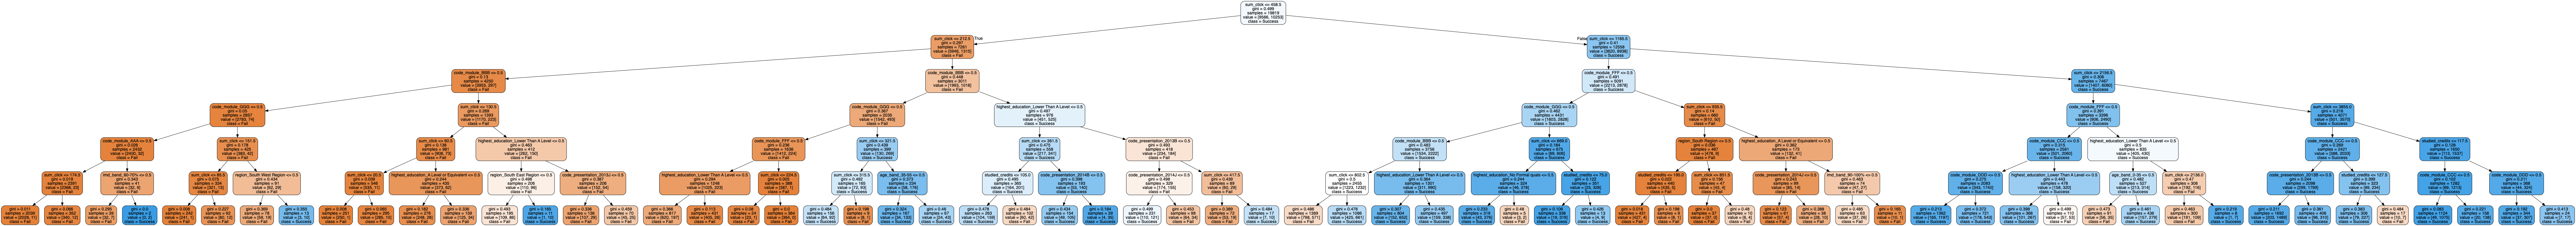

In [96]:
features = list(X.columns)
labels = ['Fail','Success']

with open("student_tree_image.dot", 'w') as f:
    f = tree.export_graphviz(tree_clf, feature_names=features, class_names=labels, filled=True, rounded=True, out_file=f)
graph = pydotplus.graph_from_dot_data(open('student_tree_image.dot').read()) 
Image(graph.create_png())    

## Problem 4: 

# Using k nearest neighbors to restore a scrambled picture

I've gone and scrambled another picture.  But, this time, I'm not providing the algorithm for putting it back together.  And while there aren't too many prominent colors in the original picture, there are many more than last time, so we can't just look for three or four common colors and filter out the noise.  

That said, the approach will be similar.  We'll use a K nearest neighbors algorithm to look in a region around a point, and assign a pixel color based on the most prevalent pixel value among the points near the pixel in question.

What does it mean to be near a point?  The x and y coordinates of our pixels establish a coordinate system.  Point (1,1) is 1 away from point (2,1).  Point (0,0) is 5 away from point (3,4).  In general, we can use the pythagorean theorem to find out how far away a point is from any other point, but that's a lot of heavy lifting on our part, and the nearest neighbor library will do that for us.

So you know ahead of time, the picture is a piece of mathematical art (I'd say more but I don't want to make it too easy to find it on the interwebs).  The scrambled picture has some larger features which you can vaguley make out before unscrambling.  The picture also has some finer features which may not be resolvable with a nearest neighbor algorithm.  Regardless, you do need to run a nearest neighbor algorithm, even if you decide to then use a different algorithm for trying to improve upon your initial results.

To do:

- Load the picture and prepare your data
- Create a nearest neighbors model
- Train the model to the data in our scrambled picture
- Make a new picture by creating a blank array
- Assign a fitted nearest neighbor values to each value in the new array
- Tune your parameters for a better output.


In [97]:
# suggested libraries
import os
import random
from PIL import Image
import numpy as np
import time
import sklearn

First things first, you need to load the picture "scramble.png", into a numpy array:

In [98]:
im = Image.open('scramble.png', 'r')
width, height = im.size
im_array = np.array(im)
im_array.shape, im.size, im_array[0,:5,:] # get info on how the data look like

((1000, 1402, 3),
 (1402, 1000),
 array([[151,  21, 129],
        [ 95, 152,  12],
        [216,  96,  39],
        [  3,  15, 177],
        [ 58,   8, 226]], dtype=uint8))

Note that we have a three dimensional object.  If you get the shape of the array, the first two numbers are x and y bounds for picture.  The last number tells us how many data are needed to express the color of each pixel.  In this problem set, we only have 3 values to keep track of: red, green and blue.  There is no intensity value this go round.

This will let us look at the nearest neighbor(s) of a pixel, and assign our pixel color based on whatever shows up most frequently.  Which parameters you choose to use (for instance, "distance" vs. "uniform" methods, number of neighbors, type of nearest neighbor algorithm) is up to you.  Different parameters may give you very different results.



Rather than use the pre-written function from week 1, we want to use a k nearest neighbors algorithm.  Take a look at the nearest neighbor [documentation page](http://scikit-learn.org/stable/modules/neighbors.html).  This may help figure out how you want your data set up for feeding into your nearest neighbor classifier.

In the cell below, you want to take the data from your picture and put it in a format that you can feed it into your classifier:

In [99]:
# This is a manual method to get the rgb triplets and pass them in a list of tuples (total of 1402000 tuples of 3)
# r = (im_array[:,:,0]).flatten()
# g = (im_array[:,:,1]).flatten()
# b = (im_array[:,:,2]).flatten()
# rgb =list(zip(r,g,b)) 
# Apparently, there is a PIL method to get the pixel values without doing it manually
# These will be the testing data

pixel_values = list(im.getdata()) 

# Loop to get the indices for the coordinates of each pixel value 
# It returns 1000x1402 tuples of 2 (y and x coordinates for each RGB triplet)
# These will be the training data
yx =[]
for i in range(len(im_array[:,0,:])):
    for j in range(len(im_array[0,:,:])):
        b = [i,j]
        yx.append(b)

# Printing some info to compare the info of the original image 3d array from above,  
# to ensure that the data were split corretly into indices with the coordinates pixels
print(len(yx), len(pixel_values), yx[:5], pixel_values[:5])

1402000 1402000 [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4]] [(151, 21, 129), (95, 152, 12), (216, 96, 39), (3, 15, 177), (58, 8, 226)]


With positions and pixel values in hand, it's time to create your classifier.  In the following cell, create a nearest neighbor classifier and set its parameters.

Note, you have options here: "distance" vs. "uniform" methods, number of neighbors, type of nearest neighbor algorithm.  This is all up to you.  Different parameters will give you very different results, and some options will radically increase your run time.  At very least, make sure you get your algorithm working before you ramp up your run time.

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split data 0.25/0.75 testing/training and use KNN's ball_tree algorithm, with distance method. l

X_train,X_test,y_train,y_test = train_test_split(yx, pixel_values)

knn = KNeighborsClassifier(n_neighbors=80, weights='distance', algorithm ='ball_tree' )


With our classifier in hand, it's time to train our model.  In the following cell, train your classifier.

In [101]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=80, p=2,
                     weights='distance')

Almost done.  Create a new array for computing corrected pixel values based on our classifer.

In [102]:
# Create an emptly 2D array 0x3 to enter the RGB triplets that the classifier will predict.
new_array = np.array([], dtype=np.uint8).reshape(0,3)

Now for the actual work.  You have a trained classifier, you just need to use it.  Iterate over the cells in your new array, and assign a pixel value based on your classifier:

(Consider working over only part of the picture if you're not sure if the algorithm is working.)

In [103]:
%%time

# loop to  enter the triplets in the new array times 4 in order to get the full size of the image (0.25*4)
for i in range(4):
     new_array = np.vstack([new_array, knn.predict(X_test)])

# reshape to a 3D array
new_pix = new_array.reshape(1000,1402,3) 

CPU times: user 5min 59s, sys: 2min 48s, total: 8min 48s
Wall time: 8min 48s


Important step.  Take a look at your output.  In the following cell, show us what your result looks like, and save the image.

Does your image look like anything?  Have you made improvements?

In [104]:
# Converting the image array to the format expected by PIL:

im = Image.fromarray((new_pix * 255).astype(np.uint8))
im.save("output.png")
im.show("output.png")

# Follow-up

Were you happy with the result you got?  Maybe?  If not, try changing your parameters and seeing if your output improves.  A number of possible changes was listed above.  There will definitely be a tradeoff between complexity of the model and run time.  As complexity increases, run time will also increase (but necessarily output quality).  I'd suggest getting your algorithm running, and only then changing parameters which will increase run time.  Set things up to run, and then go get lunch, binge watch some of your favorite new tv show, ... take a nap, or just let your computer run overnight.  Data analysis takes time.

And if you want to try other algorithms to resolve the picutre, please share.

##### The result is not what expected. In the cells below, I fit the whole data set (without split and train) I to the knn classifier, by chosing the default method and parameters.

In [105]:
knn2= KNeighborsClassifier(n_neighbors=500)
knn2.fit(yx,pixel_values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=500, p=2,
                     weights='uniform')

In [106]:
%%time

# create an empty array to store the new values
new_array2 = np.array([], dtype=np.uint8).reshape(0,3)
# predict new values for each pixel coordinate
new_array2 = np.vstack([new_array2, knn2.predict(yx)])
# reshape to convert to an image
new_pix2 = new_array2.reshape(1000,1402,3) 

CPU times: user 4min 47s, sys: 40.3 s, total: 5min 27s
Wall time: 6min 1s
Compiler : 125 ms


In [107]:
im2 = Image.fromarray((new_pix2 * 255).astype(np.uint8))
im2.save('new.png')
im2.show('new.png')

##  More neighbors required

> * **It turns out that an icrease in the number of neighbors is required to get the image. With ~ 100 neighbors, we are getting a pretty good result. Increasing the # of neighbors over 100, improves the result even more, but the algorithm takes time.**